In [2]:
import sys
!{sys.executable} -m pip install numpy

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.8/libexec/bin/python3.8 -m pip install --upgrade pip' command.


In [7]:
import sys
!{sys.executable} -m pip install pandas

  Using cached pandas-1.1.3-cp38-cp38-macosx_10_9_x86_64.whl (10.1 MB)
  Using cached pytz-2020.1-py2.py3-none-any.whl (510 kB)
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.8/libexec/bin/python3.8 -m pip install --upgrade pip' command.


In [8]:
import sys
!{sys.executable} -m pip install missingno

  Using cached missingno-0.4.2-py3-none-any.whl (9.7 kB)
     |████████████████████████████████| 29.0 MB 568 kB/s eta 0:00:01
  Using cached seaborn-0.11.0-py3-none-any.whl (283 kB)
  Using cached matplotlib-3.3.2-cp38-cp38-macosx_10_9_x86_64.whl (8.5 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
     |████████████████████████████████| 2.2 MB 669 kB/s eta 0:00:01
  Using cached kiwisolver-1.2.0-cp38-cp38-macosx_10_9_x86_64.whl (60 kB)
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.8/libexec/bin/python3.8 -m pip install --upgrade pip' command.


In [3]:
from pandas import read_csv
from pandas import set_option
from pandas import concat
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

import missingno as msno
import numpy

In [4]:
PATH = "./pima-indians-diabetes.data.csv"

In [5]:
def get_columns():
	return ["pregnant", "glucose", "pressure", "triceps", "insulin", "mass", "pedigree", "age", "diabetes"]

In [6]:
columns = get_columns()
df = read_csv(PATH, names=columns)

In [7]:
df

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,6,148,72.0,35.0,0.0,33.6,0.627,50,1
1,1,85,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122,70.0,27.0,0.0,36.8,0.340,27,0
765,5,121,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126,60.0,0.0,0.0,30.1,0.349,47,1


In [8]:
def get_peek(df, n):
	return df.head(n)

def get_dimension(df):
	return df.shape

def get_data_types(df):
	return df.dtypes

def get_data_information(df):
	return df.info()

def get_descriptive_statistics(df, with_option=True):
	if with_option:
		run_option()
	return df.describe()

def get_correlation(df):
	return df.corr()

def get_skew(df):
	return df.skew()

def get_kurtosis(df):
    return df.kurtosis()

def get_class_distribution(df, name):
	return df.groupby(name).size()

def get_missing_value(df):
	mask = df.isnull()
	total = mask.sum()
	percent = 100 * mask.mean()
	missing_value = concat([total, percent], axis=1, join="outer", keys=["count_missing", "percentage_missing"])
	missing_value.sort_values(by="percentage_missing", ascending=False, inplace=True)
	return missing_value

def run_option():
	set_option("display.width", 100)
	set_option("precision", 3)

def impute_missing_value(df):
	return df.fillna(0)

def missing_plot(df):
	mask = df.isnull()
	nullable_columns = df.columns[mask.any()].tolist()
	msno.matrix(df[nullable_columns].sample(500))
	show_plot()

def missing_heat_map(df):
	mask = df.isnull()
	nullable_columns = df.columns[mask.any()].tolist()
	msno.heatmap(df[nullable_columns], figsize=(18, 18))
	show_plot()

def show_correlation_plot(correlations, names):
	fig = pyplot.figure()
	ax = fig.add_subplot(111)
	cax = ax.matshow(correlations, vmin=-1, vmax=1)
	fig.colorbar(cax)
	ticks = numpy.arange(0, 9, 1)
	ax.set_xticks(ticks)
	ax.set_yticks(ticks)
	ax.set_xticklabels(names) 
	ax.set_yticklabels(names)
	show_plot()

def show_density_plots(df):
	df.plot(kind="density", subplots=True, layout=(3, 3), sharex=False)
	show_plot()
    
def show_scatter_plot(df):
	scatter_matrix(df)
	show_plot()

def show_histogram(df):
	df.hist()
	show_plot()

def show_whisker_plots(df):
	df.plot(kind="box", subplots=True, layout=(3, 3), sharex=False, sharey=False)
	show_plot()

def show_correlation_plot(correlations, names):
	fig = pyplot.figure()
	ax = fig.add_subplot(111)
	cax = ax.matshow(correlations, vmin=-1, vmax=1)
	fig.colorbar(cax)
	ticks = numpy.arange(0, 9, 1)
	ax.set_xticks(ticks)
	ax.set_yticks(ticks)
	ax.set_xticklabels(names) 
	ax.set_yticklabels(names)
	show_plot()

def show_plot():
	pyplot.show()



In [9]:
df_head = get_peek(df, 10)

In [10]:
df_head

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,6,148,72.0,35.0,0.0,33.6,0.627,50,1
1,1,85,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125,96.0,NaN,NaN,0.0,0.232,54,1


In [11]:
df_dimension = get_dimension(df)
df_dimension

(768, 9)

In [12]:
df_data_types = get_data_types(df)
df_data_types

pregnant      int64
glucose       int64
pressure    float64
triceps     float64
insulin     float64
mass        float64
pedigree    float64
age           int64
diabetes      int64
dtype: object

In [13]:
df_correlation = get_correlation(df)

In [14]:
df_correlation

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.156920,-0.047864,-0.054487,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.143287,0.063552,0.336731,0.221071,0.137337,0.263514,0.466581
pressure,0.156920,0.143287,1.000000,0.214499,0.089389,0.253480,0.025164,0.233921,0.067895
triceps,-0.047864,0.063552,0.214499,1.000000,0.432565,0.415395,0.190805,-0.104957,0.086557
insulin,-0.054487,0.336731,0.089389,0.432565,1.000000,0.199948,0.184799,-0.038098,0.137295
mass,0.017683,0.221071,0.253480,0.415395,0.199948,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.025164,0.190805,0.184799,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.233921,-0.104957,-0.038098,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.067895,0.086557,0.137295,0.292695,0.173844,0.238356,1.000000


In [15]:
df_information = get_data_information(df)
df_information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   pressure  762 non-null    float64
 3   triceps   736 non-null    float64
 4   insulin   716 non-null    float64
 5   mass      768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   diabetes  768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


In [16]:
df_descriptive_statistics = get_descriptive_statistics(df)
df_descriptive_statistics

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
count,768.000,768.000,762.00,736.000,716.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.65,21.429,85.595,31.993,0.472,33.241,0.349
std,3.370,31.973,18.43,15.697,117.262,7.884,0.331,11.760,0.477
min,0.000,0.000,0.00,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,64.00,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.00,24.000,49.000,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.00,33.000,132.750,36.600,0.626,41.000,1.000
max,17.000,199.000,122.00,99.000,846.000,67.100,2.420,81.000,1.000


In [17]:
df_missing_value = get_missing_value(df)
df_missing_value

,count_missing,percentage_missing
insulin,52,6.771
triceps,32,4.167
pressure,6,0.781
pregnant,0,0.000
glucose,0,0.000
mass,0,0.000
pedigree,0,0.000
age,0,0.000
diabetes,0,0.000


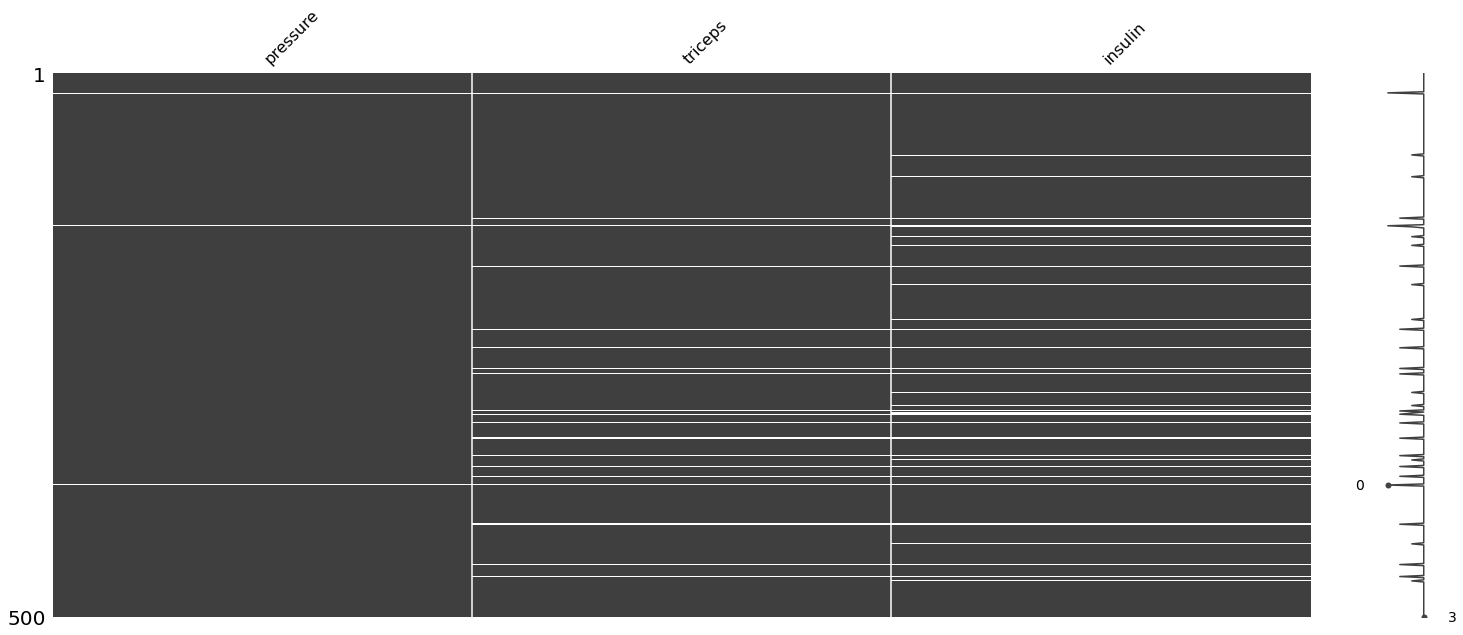

In [18]:
missing_plot(df)

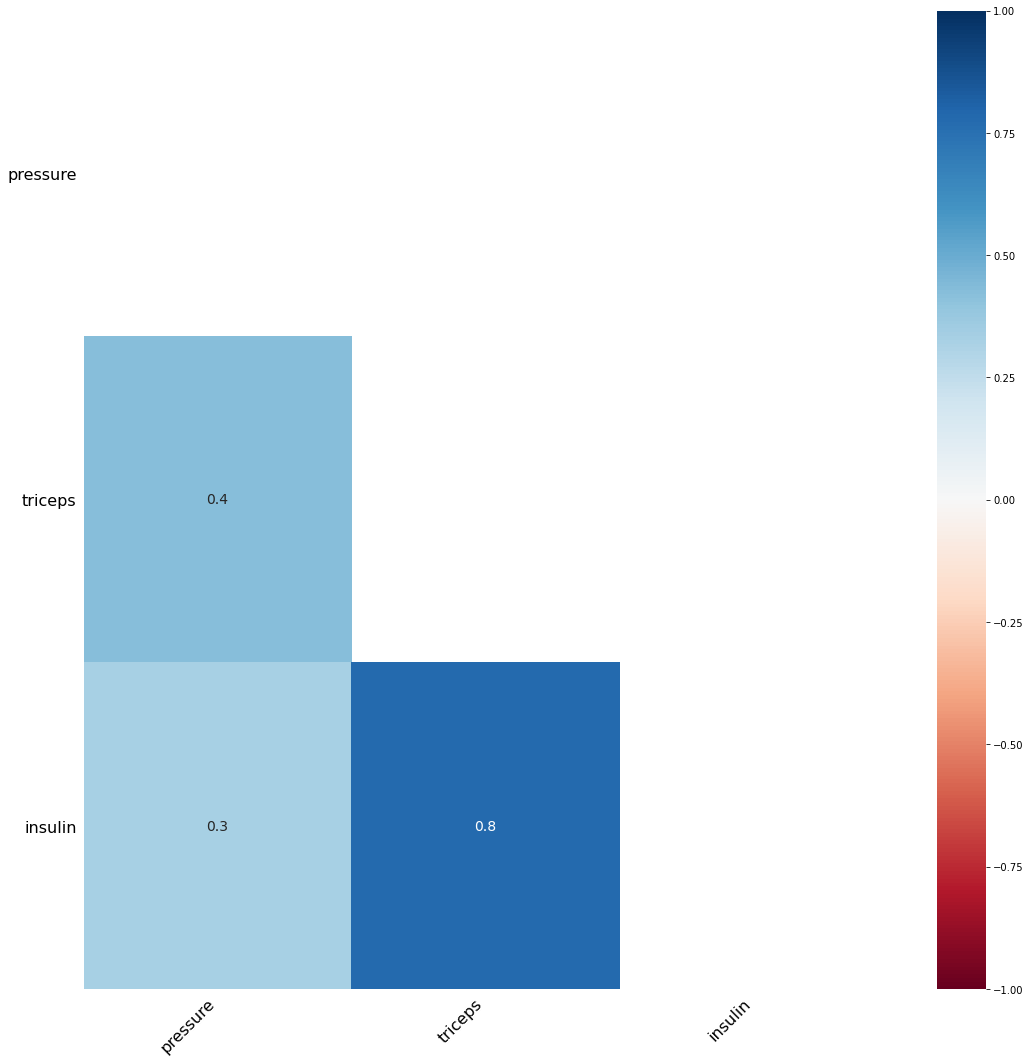

In [19]:
missing_heat_map(df)

In [20]:
new_df = impute_missing_value(df)

In [21]:
new_df

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,6,148,72.0,35.0,0.0,33.6,0.627,50,1
1,1,85,66.0,29.0,0.0,26.6,0.351,31,0
2,8,183,64.0,0.0,0.0,23.3,0.672,32,1
3,1,89,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122,70.0,27.0,0.0,36.8,0.340,27,0
765,5,121,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126,60.0,0.0,0.0,30.1,0.349,47,1


In [22]:
new_df_head = get_peek(new_df, 20)
new_df_head

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,6,148,72.0,35.0,0.0,33.6,0.627,50,1
1,1,85,66.0,29.0,0.0,26.6,0.351,31,0
2,8,183,64.0,0.0,0.0,23.3,0.672,32,1
3,1,89,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116,74.0,0.0,0.0,25.6,0.201,30,0
6,3,78,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115,0.0,0.0,0.0,35.3,0.134,29,0
8,2,197,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125,96.0,0.0,0.0,0.0,0.232,54,1


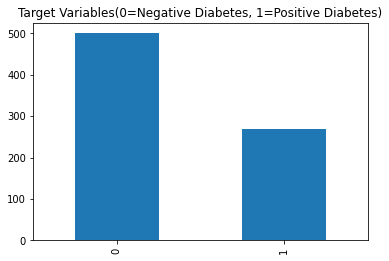

In [23]:
new_df.diabetes.value_counts().plot(kind="bar")
pyplot.title("Target Variables(0=Negative Diabetes, 1=Positive Diabetes)")
show_plot()

In [24]:
numerical_values = new_df.select_dtypes(include=[numpy.number])

In [25]:
numerical_values

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,6,148,72.0,35.0,0.0,33.6,0.627,50,1
1,1,85,66.0,29.0,0.0,26.6,0.351,31,0
2,8,183,64.0,0.0,0.0,23.3,0.672,32,1
3,1,89,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122,70.0,27.0,0.0,36.8,0.340,27,0
765,5,121,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126,60.0,0.0,0.0,30.1,0.349,47,1


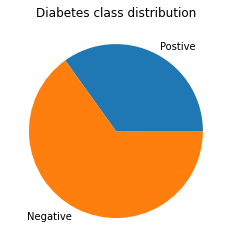

In [26]:
new_df_class_distribution = get_class_distribution(new_df, "diabetes")
positive = new_df_class_distribution.iloc[1]
negative = new_df_class_distribution[0]
pyplot.title("Diabetes class distribution")
pyplot.pie([positive, negative], labels=["Postive", "Negative"])
show_plot()

In [27]:
numerical_values.nunique().sort_values()

diabetes      2
pregnant     17
pressure     47
triceps      51
age          52
glucose     136
insulin     186
mass        248
pedigree    517
dtype: int64

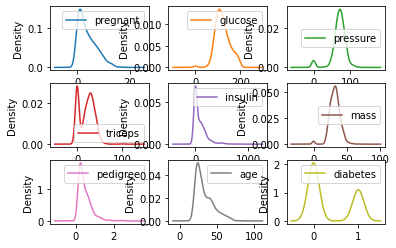

In [28]:
show_density_plots(numerical_values)


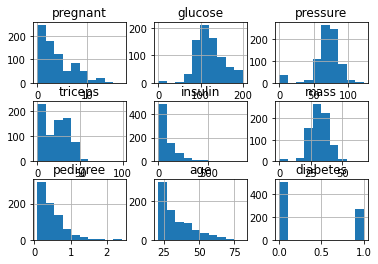

In [29]:
show_histogram(numerical_values)

In [39]:
new_df_skew = get_skew(new_df)
new_df_skew

pregnant    0.902
glucose     0.174
pressue    -1.844
triceps     0.109
insulin     2.272
mass       -0.429
pedigree    1.920
age         1.130
diabetes    0.635
dtype: float64

In [42]:
new_df_kurtosis = get_kurtosis(new_df)
new_df_kurtosis

pregnant    0.159
glucose     0.641
pressue     5.180
triceps    -0.520
insulin     7.214
mass        3.290
pedigree    5.595
age         0.643
diabetes   -1.601
dtype: float64

In [45]:
new_df_correlation = get_correlation(new_df)
new_df_correlation

,pregnant,glucose,pressue,triceps,insulin,mass,pedigree,age,diabetes
pregnant,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.034,0.544,0.222
glucose,0.129,1.000,0.153,0.057,0.331,0.221,0.137,0.264,0.467
pressue,0.141,0.153,1.000,0.207,0.089,0.282,0.041,0.240,0.065
triceps,-0.082,0.057,0.207,1.000,0.437,0.393,0.184,-0.114,0.075
insulin,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.042,0.131
mass,0.018,0.221,0.282,0.393,0.198,1.000,0.141,0.036,0.293
pedigree,-0.034,0.137,0.041,0.184,0.185,0.141,1.000,0.034,0.174
age,0.544,0.264,0.240,-0.114,-0.042,0.036,0.034,1.000,0.238
diabetes,0.222,0.467,0.065,0.075,0.131,0.293,0.174,0.238,1.000


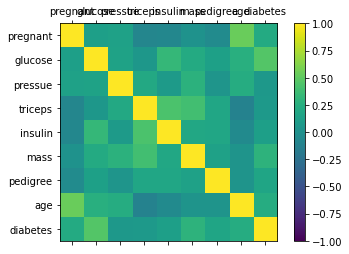

In [46]:
show_correlation_plot(new_df_correlation, columns)

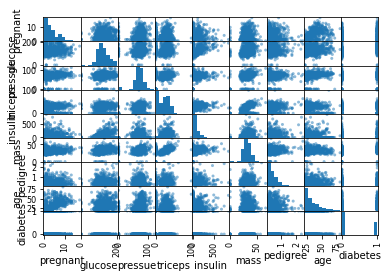

In [48]:
show_scatter_plot(new_df)

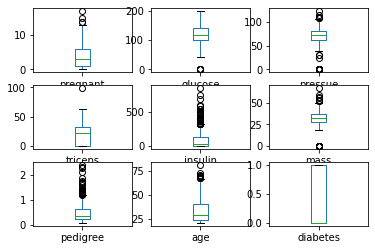

In [49]:
show_whisker_plots(new_df)